In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
#from scipy.ndimage import gaussian_filter1d
import sys

In [2]:
date = '20211202'
dataNo = 2
scanNo = 2

In [3]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [4]:
param = 'A0138: LS Freq. 1'
scan_param = scan_data[param]

In [5]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [6]:
sample1 = 200
sample2 = 1000
sample3 = 3000
unit = '[Hz]'

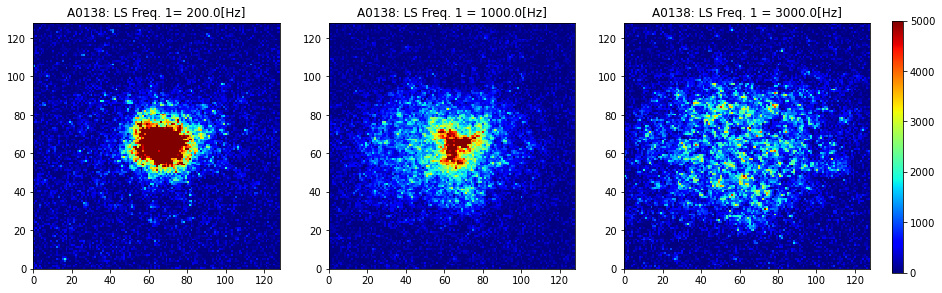

In [7]:
vmax = 5000
vmin = 0
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave


img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

fig =plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(1,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto',cmap="jet")
ax1.set_aspect('equal')
ax1.set_title(param+"= %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(1,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto',cmap="jet")
ax2.set_aspect('equal')
ax2.set_title(param+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(1,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto',cmap="jet")
ax3.set_aspect('equal')
ax3.set_title(param+" = %.01f"%(sample3)+unit)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(mappable,cax=cbar_ax)
plt.show()

a1= 0.01938792153107014
b1= 58.05364427522297
c1= 85.76476723488578
d= -0.006210268512338836
$\delta$c1= 21.813792172256708


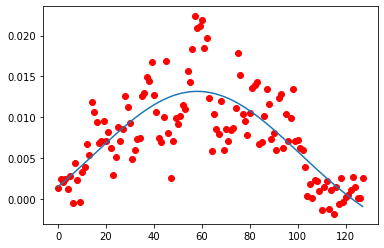

In [8]:
N=15
x_list =np.arange(np.shape(img_trans_list[0])[0])
nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
CoMy = []
CoMx = []

for i in range(len(nx)):
    CoMx += [i*nx[i]]
for i in range(len(ny)):
    CoMy += [i*ny[i]]
CoMx = np.sum(CoMx)
CoMy = np.sum(CoMy)
para_ini=[np.max(nx), CoMx,100, np.mean(nx[0:5])]
def nonlinear_fit(x,a1,b1,c1,d):
    return a1*np.exp(-2*(x-b1)**2/c1**2)+d
param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
list_x1=x_list
list_y1=[]
for num in list_x1:
    list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3])

perr=np.sqrt(np.diag(cov))
print("a1=",str(param[0]))
print("b1=",str(param[1]))
print("c1=",str(param[2]))
print("d=",str(param[3]))
print(r"$\delta$c1=",str(perr[2]))
plt.scatter(x_list,nx, label='Data',c="r")
plt.plot(x_list,list_y1)

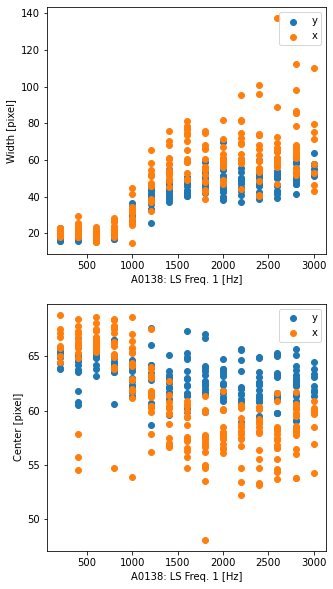

In [13]:
wx_list =[]
wy_list =[]
cx_list =[]
cy_list =[]
x_list =np.arange(np.shape(img_trans_list[0])[0])
y_list =np.arange(np.shape(img_trans_list[0])[1])
for N in range(len(trans_files)):
    nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
    ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
    CoMy = []
    CoMx = []
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx = np.sum(CoMx)
    CoMy = np.sum(CoMy)
    para_ini=[np.max(nx), CoMx,20, np.mean(nx[0:5])]
    def nonlinear_fit(x,a1,b1,c1,d):
        return a1/c1*np.exp(-2*(x-b1)**2/c1**2)+d
    param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
    wx_list.append(param[2])
    cx_list.append(param[1])
    para_ini=[np.max(ny), CoMy,20, np.mean(ny[0:5])]
    def nonlinear_fit(x,a1,b1,c1,d):
        return a1/c1*np.exp(-2*(x-b1)**2/c1**2)+d
    param, cov=scipy.optimize.curve_fit(nonlinear_fit,y_list,ny,para_ini)
    wy_list.append(param[2])
    cy_list.append(param[1])
fig =plt.figure(figsize=[5,10])
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(scan_param,wy_list, label ='y')
ax1.scatter(scan_param,wx_list, label='x')
ax1.set_xlabel('A0138: LS Freq. 1 [Hz]')
ax1.set_ylabel('Width [pixel]')
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.scatter(scan_param,cy_list, label ='y')
ax2.scatter(scan_param,cx_list, label='x')
ax2.set_xlabel('A0138: LS Freq. 1 [Hz]')
ax2.set_ylabel('Center [pixel]')
ax2.legend()


In [14]:
unique_param = scan_param.unique()
centerx_list = []
centery_list = []
widthx_list = []
widthy_list = []
centerx_err_list = []
centery_err_list = []
widthx_err_list = []
widthy_err_list = []
for i in range(len(unique_param)):
    # print(unique_param[i])
    centerx_temp = []
    centery_temp = []
    widthx_temp = []
    widthy_temp = []
    for j in range(len(trans_files)):
        if scan_param[j] == unique_param[i]:
            # print(np.sum(img_trans_list[j][y0:y1,x0:x1])/np.sum(img_trans_list[j]))
            centerx_temp.append(cx_list[j])
            centery_temp.append(cy_list[j])
            widthx_temp.append(wx_list[j])
            widthy_temp.append(wy_list[j])
    centerx_list.append(np.mean(centerx_temp))
    centery_list.append(np.mean(centery_temp))
    widthx_list.append(np.mean(widthx_temp))
    widthy_list.append(np.mean(widthy_temp))
    centerx_err_list.append(np.std(centerx_temp))
    centery_err_list.append(np.std(centery_temp))
    widthx_err_list.append(np.std(widthx_temp))
    widthy_err_list.append(np.std(widthy_temp))

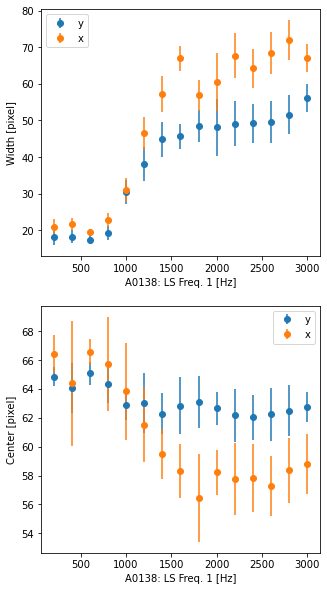

In [17]:
fig =plt.figure(figsize=[5,10])
ax1 = fig.add_subplot(2,1,1)
ax1.errorbar(unique_param,widthy_list, widthy_err_list,fmt='o',label ='y')
ax1.errorbar(unique_param,widthx_list, widthy_err_list,fmt='o',label='x')
ax1.set_xlabel('A0138: LS Freq. 1 [Hz]')
ax1.set_ylabel('Width [pixel]')
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.errorbar(unique_param,centery_list, centery_err_list, fmt='o',label ='y')
ax2.errorbar(unique_param,centerx_list, centerx_err_list,fmt='o',label='x')
ax2.set_xlabel('A0138: LS Freq. 1 [Hz]')
ax2.set_ylabel('Center [pixel]')
ax2.legend()
